In [103]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

In [104]:
#loading in the data
df = pd.read_csv('data/data_clean.csv')
#df.head(10)

In [105]:
df['account length'].describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account length, dtype: float64

In [106]:
df.shape

(3333, 19)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

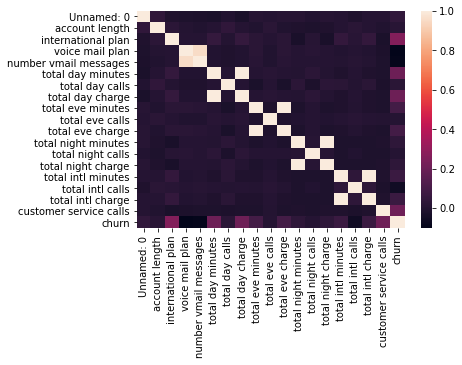

In [108]:
sns.heatmap(df.corr());

In [109]:
df = df.drop('number vmail messages', axis=1)
df = df.drop(['total day charge', 'total eve charge', 'total night charge', 'total intl charge'], axis=1)

In [110]:
df = df.drop('Unnamed: 0', axis=1)


In [111]:
y = df['churn']
X = df.drop('churn', axis =1)

X_train, X_test, y_train, y_test = train_test_split(X,y)

dummy_model = DummyClassifier(strategy='most_frequent', random_state=69)
dummy_model.fit(X_train,y_train)
dummy_model.score(X_test,y_test)

0.8597122302158273

In [112]:
#from imblearn.over_sampling import SMOTE
#print('Original class distribution: \n')
#print(y.value_counts())
#smote = SMOTE()
#X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
#print('-----------------------------------------')
#print('Synthetic sample class distribution: \n')
#print(pd.Series(y_train_resampled).value_counts()) 

In [113]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [114]:
log_reg = LogisticRegression(max_iter = 1000, random_state=69)
log_reg.fit(X_train_scaled, y_train)
log_reg.score(X_test_scaled,y_test)

0.8621103117505995

******** Model :- DecisionTreeClassifier(criterion='entropy') ********


******** Score :- 0.2805755395683453 ***********
******** Classification Report ************************


              precision    recall  f1-score   support

           0       0.93      0.18      0.30       718
           1       0.15      0.92      0.26       116

    accuracy                           0.28       834
   macro avg       0.54      0.55      0.28       834
weighted avg       0.83      0.28      0.29       834

******** Model :- KNeighborsClassifier(n_neighbors=17) ********


******** Score :- 0.2733812949640288 ***********
******** Classification Report ************************


              precision    recall  f1-score   support

           0       0.88      0.18      0.30       718
           1       0.14      0.85      0.25       116

    accuracy                           0.27       834
   macro avg       0.51      0.52      0.27       834
weighted avg       0.78      0.27      0.29     

In [115]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

log_reg = LogisticRegression(random_state=69)
rfe = RFE(log_reg, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

print(rfe.n_features_)
print(rfe.ranking_)


5
[6 1 1 1 5 1 8 4 7 3 2 1]


In [116]:
df.head()
fet_df = df.drop(['account length', 'total day calls', 'total eve calls', 'total night minutes', 'total night calls','total intl minutes','total intl calls'], axis=1)

# Logistic Regs

In [152]:
y = fet_df['churn']
X = fet_df.drop('churn', axis =1)

X_train, X_test, y_train, y_test = train_test_split(X,y)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
log_reg = LogisticRegression(random_state=69)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=69)

In [153]:
cross_val_score(log_reg, X_train_scaled, y_train, cv=5).mean()

0.8575390781563126

In [154]:
log_reg.score(X_test_scaled,y_test)

0.8597122302158273

In [156]:
param_grid = {
    'max_iter': [100,1000,5000,10000],
    'penalty': ['l1', 'l2', 'elasticnet', 'None'],
    'C': [0.001,0.009,0.01,0.09,1,5,10,25],
    'class_weight': ['None', 'balanced']

}

gs_log = GridSearchCV(log_reg, param_grid, cv=5)
gs_log.fit(X_train_scaled, y_train)

print(gs_log.best_estimator_.score(X_test_scaled, y_test))
gs_log.best_estimator_

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_se

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_se

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

0.8585131894484412


D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

LogisticRegression(C=0.09, class_weight='None', random_state=69)

# Trees

In [130]:
tree_model = DecisionTreeClassifier(random_state=69)
tree_model.fit(X_train_scaled, y_train)
print(cross_val_score(tree_model,X_train_scaled,y_train).mean())
tree_model.score(X_test_scaled, y_test)

0.8843567134268536


0.8836930455635491

In [140]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

gs_tree = GridSearchCV(tree_model, param_grid, cv=5)
gs_tree.fit(X_train_scaled, y_train)

gs_tree.best_estimator_.score(X_test_scaled, y_test)

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit fai

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit fai

0.9112709832134293

In [138]:
tree_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=69)
tree_model.fit(X_train_scaled, y_train)
print(cross_val_score(tree_model,X_train_scaled,y_train).mean())
tree_model.score(X_test_scaled, y_test)

0.9047623246492986


0.9112709832134293

# Naive Bayes

In [134]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)
print(cross_val_score(naive_bayes,X_train_scaled,y_train).mean())
naive_bayes.score(X_test_scaled, y_test)

0.8427366733466932


0.8729016786570744

# K Nearest Neighbors

In [135]:
state_farm_model = KNeighborsClassifier()
state_farm_model.fit(X_train_scaled, y_train)
print(cross_val_score(state_farm_model,X_train_scaled,y_train).mean())
state_farm_model.score(X_test_scaled, y_test)

0.8979591182364729


0.907673860911271

In [146]:
param_grid = {
    'n_neighbors': [17,19,21,27],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan']
}

gs_knn = GridSearchCV(state_farm_model, param_grid, cv=5)
gs_knn.fit(X_train_scaled, y_train)

gs_knn.best_estimator_.score(X_test_scaled, y_test)
gs_knn.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')

# Random Forest

In [157]:
forest = RandomForestClassifier(random_state=69)
forest.fit(X_train_scaled, y_train)
print(cross_val_score(forest,X_train_scaled,y_train).mean())
forest.score(X_test_scaled, y_test)

0.9175679358717435


0.9064748201438849